In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_training_df = pd.read_csv('fashion-mnist_train.csv')

In [3]:
fashion_testing_df = pd.read_csv('fashion-mnist_test.csv')

In [6]:
fashion_training_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
fashion_training_df.shape

(60000, 785)

In [4]:
training = np.array(fashion_training_df, dtype = 'float32')
testing = np.array(fashion_testing_df, dtype = 'float32')

1.0


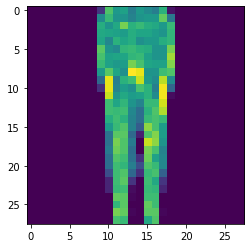

In [5]:
import random
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape((28,28)))
label = training[i, 0]
print(label)

In [6]:
X_train = training[:, 1: ]/255
y_train = training[:, 0]

X_test = testing[:, 1: ]/255
y_test = testing[:, 0]

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validaton = train_test_split(X_train, y_train, test_size = 0.2)

In [28]:
X_train.shape

tuple

In [25]:
X_validation.shape

(12000, 784)

In [26]:
X_test.shape

(10000, 784)

In [27]:
X_train.shape[0]

48000

In [15]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28,1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28,1))
X_validation = X_validation.reshape(X_validation.shape[0], *(28, 28, 1))

In [16]:
X_train.shape

(30720, 28, 28, 1)

In [11]:
X_test.shape

(10000, 28, 28, 1)

In [13]:
X_validation.shape

(9600, 28, 28, 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()

In [20]:
model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = (28, 28, 1), 
                 activation='relu'))

In [21]:
model.add(MaxPooling2D((2,2), strides=2))

In [23]:
model.add(Dropout(0.25))

In [24]:
model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

In [25]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [26]:
model.fit(X_train, y_train, epochs = 50, verbose=True, 
          validation_data=(X_validation, y_validaton))

Epoch 1/50
960/960 [==============================] - 15s 16ms/step - loss: 0.4980 - accuracy: 0.8241 - val_loss: 0.3624 - val_accuracy: 0.8750
Epoch 2/50
960/960 [==============================] - 15s 16ms/step - loss: 0.3380 - accuracy: 0.8815 - val_loss: 0.3233 - val_accuracy: 0.8866
Epoch 3/50
960/960 [==============================] - 15s 16ms/step - loss: 0.2970 - accuracy: 0.8938 - val_loss: 0.2946 - val_accuracy: 0.8971
Epoch 4/50
960/960 [==============================] - 14s 15ms/step - loss: 0.2666 - accuracy: 0.9037 - val_loss: 0.3000 - val_accuracy: 0.8936
Epoch 5/50
960/960 [==============================] - 15s 15ms/step - loss: 0.2437 - accuracy: 0.9115 - val_loss: 0.3081 - val_accuracy: 0.8878
Epoch 6/50
960/960 [==============================] - 15s 15ms/step - loss: 0.2247 - accuracy: 0.9175 - val_loss: 0.2926 - val_accuracy: 0.8973
Epoch 7/50
960/960 [==============================] - 16s 16ms/step - loss: 0.2089 - accuracy: 0.9224 - val_loss: 0.2778 - val_accuracy:

In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, )

313/313 [==============================] - 1s 4ms/step - loss: 0.5207 - accuracy: 0.9064


In [28]:
print(print('Accuracy on test dataset:', test_accuracy))

Accuracy on test dataset: 0.9064000248908997
None


In [29]:
predictions = model.predict(X_test)

In [35]:
np.argmax(predictions[1])

1

In [34]:
y_test[1]

1.0

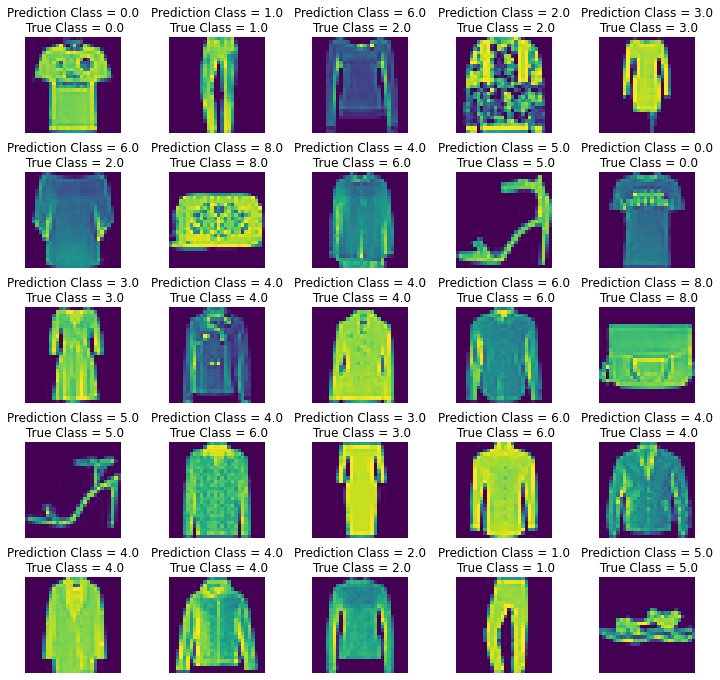

In [38]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(np.argmax(predictions[i]), y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [46]:
predicted_classes = model.predict_classes(X_test)

/home/emdadul-tareque/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


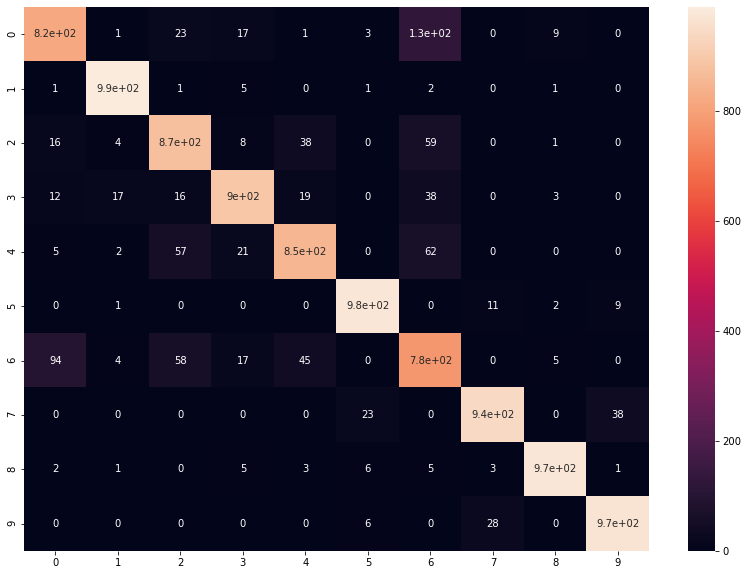

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)